# Assignment 5

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

In [1]:
NAME = "Alfredo Renteria"

## Question 1: GRU/LSTM

We've seen both LSTM and GRU cells as building blocks for RNNs.

Here is a reminder of each of their corresponding architectures:

![Pic](https://drive.google.com/uc?id=1INZQkDev_8rdFxOT9hfAiPWJRT6-N82S)

### Question 1.i) What are the major differences between each?


The major difference between LSTM and GRU can be observed by the diagram above, and that involves the number of gates in each respective architecture. \
With LSTM possesing three gates; input, forget, and output, and GRU posessing only two gates; reset and update. \
Also, LSTM maintains a memory cell state, where GRU lacks this structure.


### Question 1.ii) What are the major advantages of each?

A major advantage of both, are that they can be used to avoid vanishing and exploding gradients problems found in RNNs.

LSTM: Their accuracy and overall better performance over datasets implementing larger sequences.
$$ \\ $$
GRU: Since they have less gates or 'regulators' compared to LSTM, the GRU has better performance with smaller datasets or information over shorter periods of time. \
GRUs can train faster due to having less parameters given their architecture, when compared to LSTMs for the datasets described above.

### Question 1.iii) What are the major disadvantages of each?

LSTM: While it was invented to solve the vanishing gradient problem, it is still susceptible to the exploding gradient problem.
$$ \\ $$
GRU: Just like how the GRU can perform better on certain smaller and less frequent datasets. \
It has worse performance with bigger and more frequent datasets, compared to the LSTM's performance on a similiar dataset. \
This is is due to GRU being a more simplified version of the LSTM.

## Question 2: United States Corona Virus Cases Forecast

### Question 2.i) Import data and get data for United States
We will be using a subset of Corona Virus dataset available at [Kaggle.com](https://www.kaggle.com/). The dataset is rather comprehensive so for our predictions we will use the number of cases in the United States from the 1 January 2020 (when this record starts) to 14 July 2020 (the last time this dataset was updated). The numbers of cases is cumulative.

You may want to switch to GPU in "Runtime"->"Change Runtime type" for this assignment.

** Note: The full data set is available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv

In [2]:
# Import and get data
import numpy as np
import pandas as pd
!wget "https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv"

--2020-07-27 01:06:54--  https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv
Resolving people.ucsc.edu (people.ucsc.edu)... 128.114.119.88
Connecting to people.ucsc.edu (people.ucsc.edu)|128.114.119.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178638 (174K) [text/csv]
Saving to: ‘time_series_covid_19_confirmed.csv.2’

time_series_covid_1 100%[===================>] 174.45K  --.-KB/s    in 0.1s    

2020-07-27 01:06:54 (1.47 MB/s) - ‘time_series_covid_19_confirmed.csv.2’ saved [178638/178638]



In [3]:
# Load data
dataframe = pd.read_csv("time_series_covid_19_confirmed.csv")

Let's look at the data

In [4]:
dataframe.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


This data set is somewhat scattered. Some of rows represent an entire country's case data while some country's case data is split up into province. But we want to extract US case data.

In [5]:
# Extract US corona data and drop province/state - Long.
US_dataframe = dataframe[dataframe['Country/Region'] == 'US']
US_dataframe.head()
US_dataframe = US_dataframe.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [6]:
US_dataframe.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


Now we have a case dataframe containing the US case numbers ranging from 22 January 2020 to 14 July 2020. However, lets only consider the data from 2 March 2020 when the total number of Corona virus cases in the US exceeded 50,000.

In [7]:
# Cut off first 40 days of data
US_dataframe = US_dataframe.iloc[:, 40:]
US_dataframe.shape

(1, 135)

In [8]:
US_dataframe.head()

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,53,73,104,174,222,337,451,519,711,1109,1561,2157,2870,2968,4360,6141,8917,14157,19479,25825,33761,43850,54112,66055,84091,102276,122069,141205,162707,188724,214205,244610,276547,309699,337573,367215,397992,429686,464442,497943,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


#### Question 2.i.a) Plot the cases for the US 
Using seaborn.linepolot, Plot the cases in the US in a Number of Cases vs. Day plot.
**Hint: you may need np.linspace to create an x-axis. You will also need to cast US_dataframe into an np.array using US_dataframe.values. You will likely need to call reshape ino order to transform the new np.array into shape (135,)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


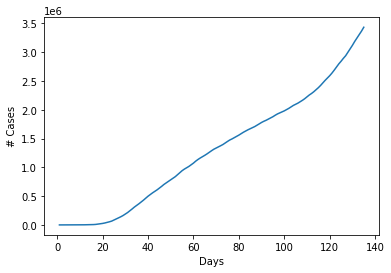

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initially reshaped with: reshape(-1), but didn't want to lose points by not meeting spec. of shape (135,)
# Since reshape(-1) returns 2d array of shape (135, 1)
US_data = US_dataframe.values.reshape(135,)
x_axis = np.linspace(1, 135, num=135)
sns.lineplot(x=x_axis, y=US_data);
plt.xlabel('Days')
plt.ylabel('# Cases')
plt.show()

#### Question 2.i.b) Analyzing the plot
If you plotted the data correctly, it looks like there are some slight trends in the plot. Recalling that the data starts on 22nd of January, describe some of the trends that you may see. When did cases start to raise dramatically? Did the total number of cases ever seem to stop growing? Add approximate dates.

For the plotted data, the 22nd of January and the following 39 days were removed. Day 0 is actually day 41 from the original dataset, the 2nd of March. A notable trend, is that around day 21, the 23rd of March, a dramatic positive slope increase can be observed. And the graph doesn't show it's slope flattening in any timeframe after this date. Again, cases started to rise dramatically at the end of March, around the 23rd of March. The total number of cases don't seem to stop growing after the noted dramatic rise, but towards the beginning, the graph seems to show a slower growth rate. If we had left the previous 40 days in the dataset, this slower growth rate would be more appreciated.

### Question 2.ii) Analyzing the plot
As an aside, disease spread often occur on an exponential scale. Therefore, we will analyze the data in the logarithmic scale. We'll apply the np.log function to the dataframe below then plot the transformed data.

In [10]:
# Apply natural log to the US_dataframe
df = US_dataframe.apply(np.log)

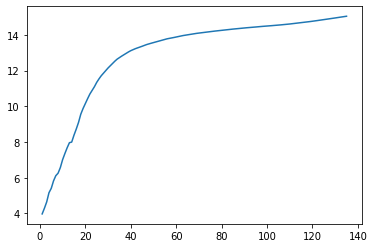

In [11]:
sns.lineplot(x = np.linspace(1,135,135), y = df.values.reshape(-1))

The plot above shows that on a logarithmic scale, the cumulative number of cases began to level off around days 20-30 but towards day 120 we see that the growth in the number of cases has begun to tick upwards again. Now we will do our time series prediction on the US_dataframe.

#### Question 2.iii.a) Apply MinMaxScaler to US_dataframe
Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. Use it to scale the data for our analysis. 
** Hint: You will need to call .transpose inorder to comply with required inputshape (n,1)

In [12]:
from sklearn import preprocessing

US_df = np.transpose(US_dataframe)
scaler = preprocessing.MinMaxScaler()
US_data = scaler.fit_transform(US_df) 

#### Question 2.iii.b) Split data into train and test for time series prediction
We will begin by splitting US_dataframe into train and test data. Begin with split = 0.7.

In [13]:
# Use this function to create train/test split
def train_test_split(arr: np.array, split = 0.7):
    train_size = int(len(arr) * split)
    test_size = len(arr) - train_size
    US_train, US_test = arr[0:train_size,:], arr[train_size:len(arr),:]
    print("train.shape: ", US_train.shape)
    print("test.shape: ", US_test.shape)
    return (US_train, US_test)

In [14]:
# Call train_test_split on US_data
train, test = train_test_split(US_data)

train.shape:  (94, 1)
test.shape:  (41, 1)


Now we create the dataset time_step determines how many days back the model will look to generate a new prediction. Begin with time_step=2

In [15]:
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days 
# And y contains the reading for today.
def create_dataset(dataset, time_steps=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_steps-1):
		a = dataset[i:(i+time_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_steps, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
# Choose the number of time steps that the model "looks back"
time_steps = 2
# Create your training dataset.
X_train, y_train = create_dataset(train, time_steps)
# Create your test dataset.
X_test, y_test = create_dataset(test, time_steps)

In [17]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#### Question 2.iii.c) LSTM Architecture
Next build the LSTM model. We don't have a lot of data so build the model with:
<ul>
<li>Input Layer shape of size (1,time_steps)</li>
<li>An LSTM Laywer with 10 units</li>
<li>Dense Layer with 1 neuron</li>

Then use 'mean_squared_error' loss with an optimizer.\
Run model.summary(), compile, then fit the model.\
Train for 100 epochs using X_train, y_train, validation_split = 0.2

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas
import math
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Build model architecture here
sars_cov_2_model = Sequential()
# Input layer shape of size (1,time_steps) & LSTM layer with 10 units  
sars_cov_2_model.add(LSTM(10, input_shape=(1, time_steps)))
# Dense layer with 1 neuron
sars_cov_2_model.add(Dense(1, activation='linear'))

# Model summary
sars_cov_2_model.summary()

# Compile model
sars_cov_2_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fit model
history = sars_cov_2_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 72 samples, validate on 19 samples
Epoch 1/100
72/72 [==============================] - 1s 7ms/step - loss: 0.0455 - val_loss: 0.2340
Epoch 2/100
72/72 [==============================] - 0s 274us/step - loss: 0.0434 - val_loss: 0.2265
Epoch 3/100
72/72 [==============================] - 0s 251us/step - loss: 0.0416 - val_loss: 0.2192
Epoch 4/100
72/72 [==============================] - 0s 241us/step - loss: 0.0397 - val_loss: 0.2122
Epoch 5/100
72/72 [==============================] - 0s 239us/step - loss: 0.0379 - val_loss: 0.2052
Epoch 6/100
72/72 [==============================] - 0s 267us/step - loss: 0.0363 - val_loss: 0.1984
Epoch 7/100
72/72 [==============================] - 0s 388us/step - loss: 0.0345 - val_loss: 0.1917
Epoch 8/100
72/72 [==============================] - 0s 254us/step - loss: 0.0331 - val_loss: 0.1851
Epoch 9/100
72/72 [==============================] - 0s 267us/step - loss: 0.0316 - val_loss: 0.1789
Epoch 10/100
72/72 [=============================

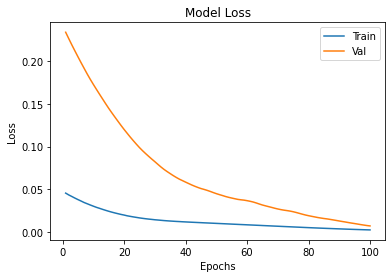

In [20]:
# Plot the Model loss
def plot_losses(hist):
    plt.plot([x+1 for x in range(100)], hist.history['loss'])
    plt.plot([x+1 for x in range(100)], hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Val'])
    plt.show()

plot_losses(history)


Lets look at our predictions

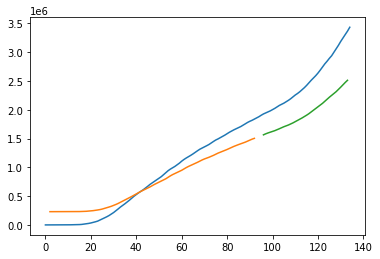

In [21]:
# Make predictions
trainPredict = sars_cov_2_model.predict(X_train)
testPredict = sars_cov_2_model.predict(X_test)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(US_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(US_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(US_data)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(US_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The Blue line is the real number of cases. the Orange line is the train_predicted number of cases, and the green line is the test_predicted number of cases.

#### Question 2.iii.d)
Comment on the fit of your prediction? Are there any interesting correlations between the cumulative case numbers that we plotted above and your forecast?

1) Recall that day 0 is March 2, 2020. My prediction overfits the Blue line up to day 40, April 11, 2020. After this day, my prediction falls under the real number of cases; underfits the Blue line. \
By observation of the model loss graph, the validation and training lines meet, which indicates good model performance. Although performance can be improved if the lines meet at an earlier epoch. \
Source: https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

2) An interesting correlation between my prediction lines and the real number of cases line, is that they have a similar shape or curvature behavior. \
Observing the peak of the test prediction line, there is a difference of ~600k cases, which sums this model as a wishful prediction :(.

**Note: This model along with the two below were ran multiple times to ensure that analysis(comments/correlations) reflects the performance of the actual models.

#### Question 2.iii.e)
Re-run Question 2.iii.a to 2.iii.c but with split = 0.9. Was your prediction closer to the actual trend? Explain why or why not the prediction was closer to the real trend.

After re-running 2.iii.a-2.iii.c cells with split = 0.9. \
The prediction line overfits the blue line with greater distance compared to the previous model. Also in this model, the overfitting extends to approximately day 50. \
However, after approximately day 50, this model underfits the blue line 'tighter'(closer) than the previous model, and the curvature behavior is very similar to the blue line. \
Overall, yes, this prediction is closer to the actual trend. I believe this better performance is due to the fact of getting more training data, since we now split = 0.9. \
Although more data does not guarantee better performance, for this specific modeling it did benefit the prediction.

#### Question 2.iii.f)
This time, try adjusting the parameters time_steps and choose a split to your liking. See if you can get your model to do anything else that is interesting. Explain the changes that you made.

For this model, I adjusted parameters to time_steps = 4, and split = 0.9. \
The overfitting at the beginning still occurs as in the previous models, however this time, it is a tighter(closer) overfit and only goes on to approximately day 30-35. \
After this day, and having tested the model multiple times. I obversed that the train prediction and test prediction lines at times overlapped the blue line. \
In the worst case, the train prediction followed the behavior of the blue line and skewed off at the end, around day 100, with the test prediction line slightly underfitting the blue line. \
Overall, this model's performance can be interpreted as the most accurate model of the three.   

## Question 3: Denoising Autoencoder
Now we will build a Denoising auto-encoder to denoise smiley face pictures gathered at the [SMILEsmileD](https://github.com/hromi/SMILEsmileD) archive.
<center><img src="https://people.ucsc.edu/~mbriden/cse140/smiles.png" width="300"></center>

### Question 3.i) Import and display sample images
Let us begin by getting our imports and downloading the dataset.

In [22]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
%matplotlib inline

In [23]:
# Download data
url = 'https://github.com/hromi/SMILEsmileD/archive/master.zip'
request.urlretrieve(url, 'data.zip')
zipfile.ZipFile('data.zip').extractall()

In [24]:
# Open images
x_pos = []
base_path = 'SMILEsmileD-master/SMILEs/'
positive_smiles = base_path + 'positives/positives7/'
negative_smiles = base_path + 'SMILEsmileD-master/SMILEs/negatives/negatives7/'
for img in os.listdir(positive_smiles):
    x_pos.append(mpimg.imread(positive_smiles + img))

# Change into np.array and scale to 255. which is max
x_pos = np.array(x_pos)/255.

# Reshape
x_pos = x_pos.reshape(len(x_pos),64,64,1)

# Shuffle the images in case there was some underlying order
np.random.shuffle(x_pos)

# Split into test and train set, but we will use keras built in validation_size
x_pos_train = x_pos[int(x_pos.shape[0]* .20):]
print("x_pos_train.shape:",x_pos_train.shape)
x_pos_train_noisy = x_pos_train + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_train.shape)

x_pos_test = x_pos[:int(x_pos.shape[0]* .20)]
print("x_pos_test.shape:",x_pos_test.shape)
x_pos_test_noisy = x_pos_test + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_test.shape)

x_pos_train.shape: (2952, 64, 64, 1)
x_pos_test.shape: (738, 64, 64, 1)


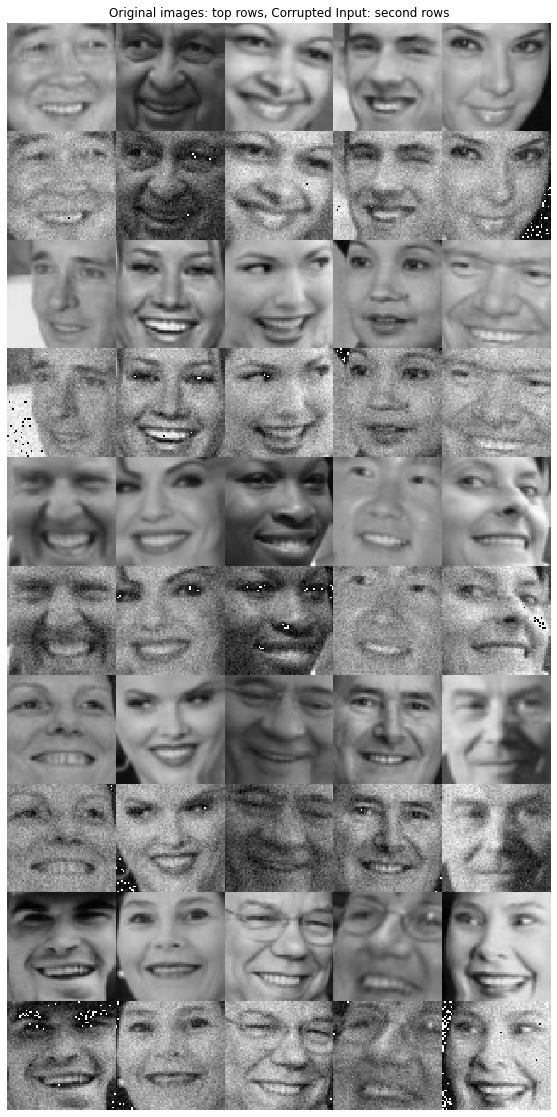

In [25]:
# Display the 1st 5 original and corrupted
image_size = 64
rows, cols = 5, 5
num = rows * cols
imgs = np.concatenate([x_pos_train[:num], x_pos_train_noisy[:num]])
imgs = imgs.reshape((rows * 2, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 2, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: second rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

### Question 3.ii) Build the Model


#### Question 3.ii.a) Build an Encoder Model
Above are the images before and after being corrupted. Now we will build the autoencoder. Build the Encoder with the following requirements:
<ul>
<li>Input Layer shape of size (64,64,1)</li>
<li>Latent_dimension of 16</li>
<li>Use two CNN layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 dense layer of size Latent_dimension</li>
</ul>

Your model should have an input size of (64,64,1) and an output size of (None,16).

** hint: hint: refer to the last class exercise on autiencoders.

In [26]:
# Building the encoder architecture here

# Network parameters
input_shape = (image_size, image_size, 1)
batch_size = 96
kernel_size = 3
latent_dim = 16

# Encode/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

shape = K.int_shape(x)

x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

encoder = Model(inputs, latent, name='encoder')

In [27]:
# Print model summary
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                262160    
Total params: 280,976
Trainable params: 280,976
Non-trainable params: 0
_________________________________________________________________


#### 3.ii.b) Build an Dencoder Model
Next we will build the decoder model. This model should have
<ul>
<li>Input Layer shape of size (latent_dimension,)</li>
<li>1 dense layer with the size of 16*16*64</li>
<li>Two transposed convolution layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 conv2dTranspose layer with 1 filter and kernel size of 3</li>
<li>1 Output layer with sigmoid activation</li>
</ul>

In [28]:
# Building the decoder architecture here
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)
outputs = Activation('sigmoid', name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             278528    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 64, 64, 1)         289       
_________________________________________________________________
decoder_output (Activation)  (None, 64, 64, 1)         0   

#### Question 3.ii.c) Build Encoder + Dencoder Model
Now combine encoder and decoder models and build the autoencoder architecture.

In [29]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
# Print Model Summary
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 16)                280976    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 1)         334209    
Total params: 615,185
Trainable params: 615,185
Non-trainable params: 0
_________________________________________________________________


Call compile using 'mse' loss with an optimizer (adam is probably the safest one to use). Call autocoder.fit with x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy). 

In [30]:
# Compile
autoencoder.compile(loss='mse', optimizer='adam')

# Train the Autoencoder
autoencoder.fit(x_pos_train_noisy, 
                x_pos_train,
                validation_data=(x_pos_test,x_pos_test_noisy),
                epochs=10,
                batch_size=batch_size)

Train on 2952 samples, validate on 738 samples
Epoch 1/10
2952/2952 [==============================] - 2s 731us/step - loss: 0.0276 - val_loss: 0.0274
Epoch 2/10
2952/2952 [==============================] - 1s 220us/step - loss: 0.0225 - val_loss: 0.0208
Epoch 3/10
2952/2952 [==============================] - 1s 228us/step - loss: 0.0144 - val_loss: 0.0149
Epoch 4/10
2952/2952 [==============================] - 1s 226us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 5/10
2952/2952 [==============================] - 1s 225us/step - loss: 0.0100 - val_loss: 0.0122
Epoch 6/10
2952/2952 [==============================] - 1s 221us/step - loss: 0.0093 - val_loss: 0.0115
Epoch 7/10
2952/2952 [==============================] - 1s 224us/step - loss: 0.0085 - val_loss: 0.0108
Epoch 8/10
2952/2952 [==============================] - 1s 226us/step - loss: 0.0081 - val_loss: 0.0104
Epoch 9/10
2952/2952 [==============================] - 1s 222us/step - loss: 0.0077 - val_loss: 0.0100
Epoch 10/10
2952/

### Question 3.iii) Print denoised images (predictions)

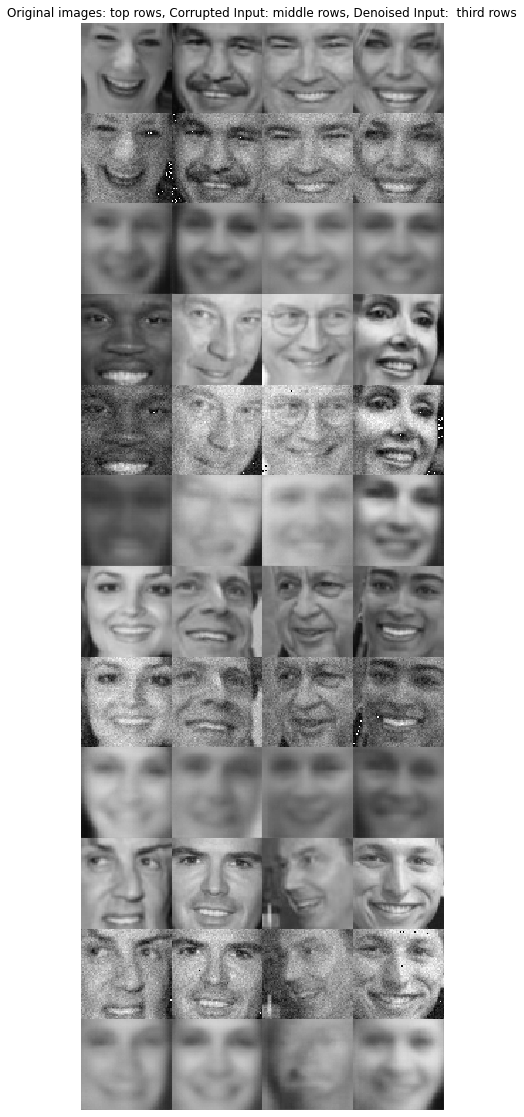

In [31]:
# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_pos_test_noisy)
# Display the 1st 4 corrupted and denoised images
rows, cols = 4, 4
num = rows * cols
imgs = np.concatenate([x_pos_test[:num], x_pos_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

Comment on how your model has performed. Was your model able to denoise the image successfully? Is there anything unexpected results about the images? MSE error is known to smooth an image too much, did your model suffere the same result?

1) My model was successful in denoising the images, although the quality of the produced images is similar to an excessive application of gaussian blur as found in image editing software. This indicates that the performance of my model can be improved.
2) Aside from their over-blurred quality. When re-running the model compile and fit cells in testing, I found my model loss graphs(now omitted) to show overfitting issues, and thus my resulted images would show noise and pixelation. This made me reconsider my testing procedure, so I then re-ran the cells from the beginning of 3.i)
3) Yes my model did suffer from over-smoothed images, and produced images with an excesive blur quality. Tinkering with the 'batch_size' parameter, I noticed some sets of images had slightly less blurry qualities when setting batch size to 96 instead of 128(as demonstrated in class exercise).
